# Project 3: Vehicle Fuel Efficiency – Data Preparation & Feature Engineering

## Dataset Source
Auto MPG dataset (Kaggle – open-source).

## Purpose
This project focuses on preparing vehicle fuel efficiency data for machine learning by cleaning the dataset, handling missing values, reviewing outliers, engineering features, and validating them using visual analysis.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Dataset

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 3. Data Understanding

In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


## 4. Data Cleaning

In [4]:
# Convert horsepower to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Handle missing values
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Remove duplicates
df = df.drop_duplicates()

## 5. Feature Engineering

In [5]:
# Create new features
df['weight_per_cylinder'] = df['weight'] / df['cylinders']
df['is_older_car'] = np.where(df['model year'] < 76, 1, 0)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,weight_per_cylinder,is_older_car
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,438.000,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,461.625,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,429.500,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,429.125,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,431.125,1


## 6. Exploratory & Feature Validation Visuals

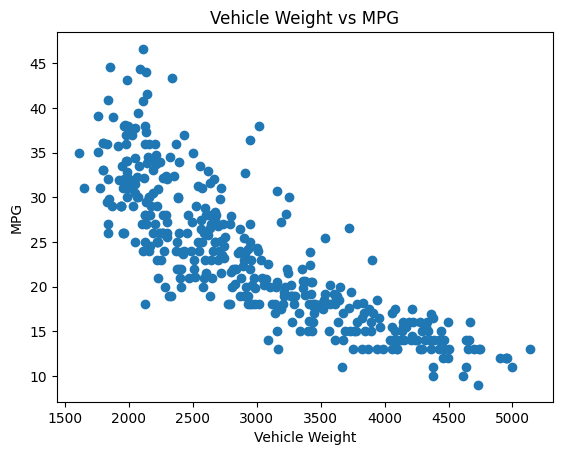

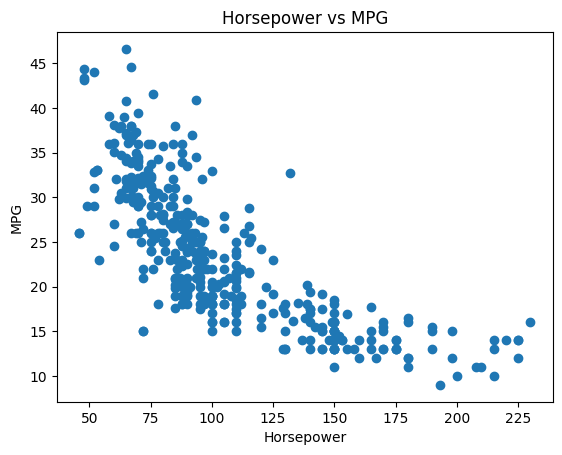

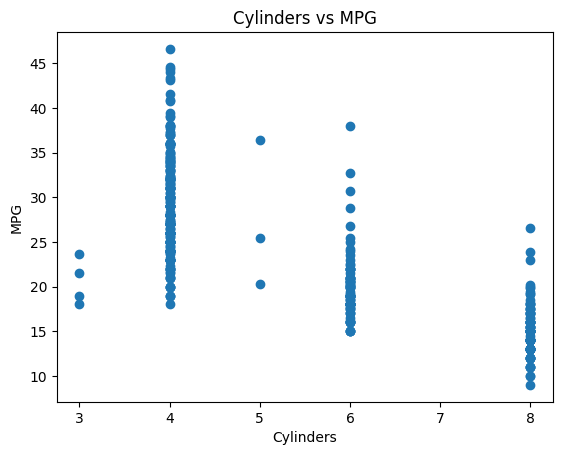

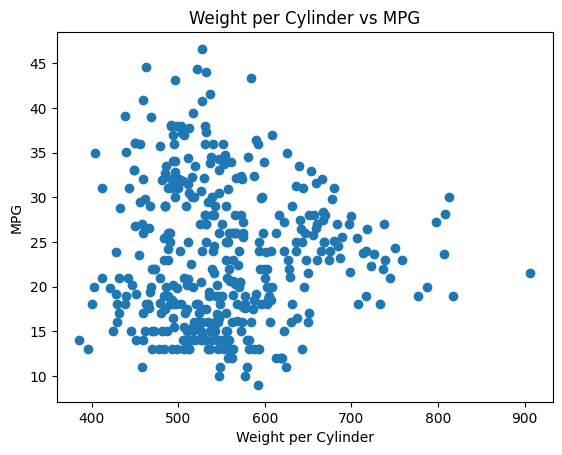

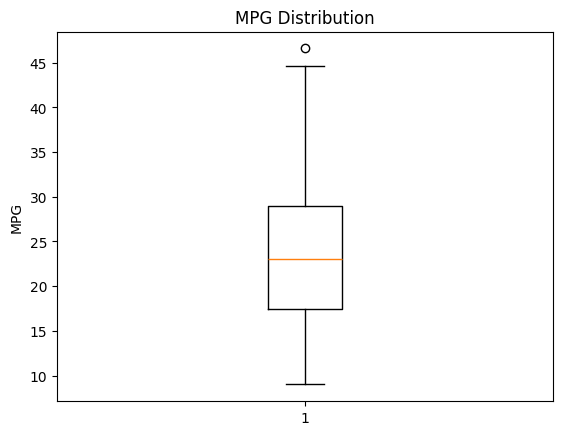

In [6]:
# Visual 1: Weight vs MPG
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('Vehicle Weight')
plt.ylabel('MPG')
plt.title('Vehicle Weight vs MPG')
plt.show()

# Visual 2: Horsepower vs MPG
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG')
plt.show()

# Visual 3: Cylinders vs MPG
plt.scatter(df['cylinders'], df['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Cylinders vs MPG')
plt.show()

# Visual 4: Weight per Cylinder vs MPG
plt.scatter(df['weight_per_cylinder'], df['mpg'])
plt.xlabel('Weight per Cylinder')
plt.ylabel('MPG')
plt.title('Weight per Cylinder vs MPG')
plt.show()

# Visual 5: MPG Distribution (Outlier Review)
plt.boxplot(df['mpg'])
plt.ylabel('MPG')
plt.title('MPG Distribution')
plt.show()

## 7. Final Dataset Summary

In [7]:
print('Final dataset shape:', df.shape)
print('Engineered features:', ['weight_per_cylinder', 'is_older_car'])
df.head()

Final dataset shape: (398, 11)
Engineered features: ['weight_per_cylinder', 'is_older_car']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,weight_per_cylinder,is_older_car
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,438.000,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,461.625,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,429.500,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,429.125,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,431.125,1


## 8. Reflection

In this project, I focused on preparing the Auto MPG dataset for machine learning. I cleaned the data, handled missing values, reviewed outliers, and created new features to better represent vehicle characteristics. Using visual analysis helped confirm that both original and engineered features had meaningful relationships with fuel efficiency. This project reinforced the importance of strong data preparation before applying any machine learning models.